# Create Synthetic data with Scikit-Learn

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import tensorflow as tf
import math
import torch
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable 
from pyswarm import pso
from pyswarms.utils.functions import single_obj as fx
from torchswarm.swarmoptimizer import SwarmOptimizer
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from pyswarm import pso
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from skmultiflow.drift_detection.adwin import ADWIN
from sklearn.metrics import classification_report, accuracy_score  

C:\Users\Jenny.Son\Anaconda3\envs\geoenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


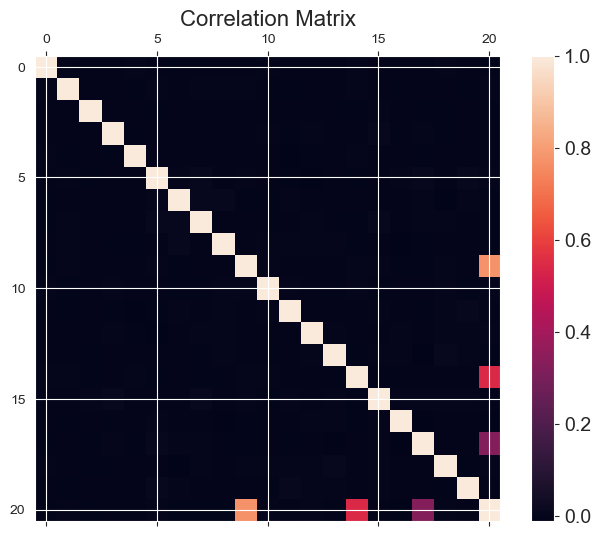

In [190]:
#Create synthetic dataset n=100,000

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

fig = plt.figure(figsize=(8, 6))

X, y = datasets.make_regression(n_samples=100000, n_features=20,n_informative=3, noise=0.2)

reg_df = pd.DataFrame(X, columns=['Ft %i' % i for i in range(20)])

reg_df['y'] = y


plt.matshow( reg_df.corr(), fignum=fig.number )

cb = plt.colorbar()

cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize=16);

In [99]:
reg_df.head()

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,...,Ft 11,Ft 12,Ft 13,Ft 14,Ft 15,Ft 16,Ft 17,Ft 18,Ft 19,y
0,-1.231324,-0.366819,-1.658724,-1.255486,0.792699,-1.880318,0.152380,-1.128716,-0.087114,0.509360,...,-0.779739,0.789660,0.999720,-0.135897,-0.464011,0.366720,0.088249,0.809420,0.720614,-45.831493
1,-0.660244,-1.062163,0.412682,0.287634,1.293906,-1.163261,0.077184,0.258443,-0.614876,-0.413330,...,0.619159,1.428694,-2.799266,-2.449588,-0.570657,-1.509717,-0.827731,-0.021444,1.406714,-22.493294
2,-0.370319,-1.538521,-0.839489,0.491596,0.237623,0.393501,0.456270,0.565185,-0.570129,-0.787466,...,0.875987,1.783993,0.626882,0.498108,0.277256,-0.184515,-0.770135,-0.485269,-1.554228,-99.371294
3,0.530095,-1.082518,-0.722681,0.405181,-1.243128,-0.038588,-0.210722,2.418514,1.173066,0.105251,...,0.619015,-0.674378,-0.222535,1.136827,0.306199,1.003749,-0.405794,1.231311,-0.295732,62.713741
4,-0.268619,-0.780922,-0.950552,-1.012766,-0.018942,-0.362658,-0.861684,0.881802,1.979267,-1.683136,...,-2.504747,-0.361341,1.652307,-0.891400,-0.048864,0.358209,0.169939,-0.040962,1.487906,-178.302652


In [100]:
reg_df.shape

(100000, 21)

In [101]:
reg_df.describe

<bound method NDFrame.describe of            Ft 0      Ft 1      Ft 2      Ft 3      Ft 4      Ft 5      Ft 6  \
0     -1.231324 -0.366819 -1.658724 -1.255486  0.792699 -1.880318  0.152380   
1     -0.660244 -1.062163  0.412682  0.287634  1.293906 -1.163261  0.077184   
2     -0.370319 -1.538521 -0.839489  0.491596  0.237623  0.393501  0.456270   
3      0.530095 -1.082518 -0.722681  0.405181 -1.243128 -0.038588 -0.210722   
4     -0.268619 -0.780922 -0.950552 -1.012766 -0.018942 -0.362658 -0.861684   
...         ...       ...       ...       ...       ...       ...       ...   
99995  1.222716 -0.514940 -0.291652  0.642885  1.218600  0.290936 -0.230724   
99996 -0.189479 -1.229843 -0.326055 -0.373174 -0.942694 -0.526500 -0.513979   
99997 -0.332037 -0.458791  0.388719 -0.462213 -1.071090  0.445945  0.765993   
99998 -0.773355  0.386395 -2.172909 -0.300278  0.429456  0.835998  1.910803   
99999  0.321028  0.192248  1.422222 -1.849240 -1.523087 -0.314692  0.206337   

           Ft 7  

In [189]:
import pandas as pd
import numpy as np

#Create random date field using range of 2019,2020,2021
reg_df['date'] = np.random.choice(pd.date_range('2019-01-01', '2021-12-31'), 100000)
print(reg_df)


           Ft 0      Ft 1      Ft 2      Ft 3      Ft 4      Ft 5      Ft 6  \
0     -1.231324 -0.366819 -1.658724 -1.255486  0.792699 -1.880318  0.152380   
1     -0.660244 -1.062163  0.412682  0.287634  1.293906 -1.163261  0.077184   
2     -0.370319 -1.538521 -0.839489  0.491596  0.237623  0.393501  0.456270   
3      0.530095 -1.082518 -0.722681  0.405181 -1.243128 -0.038588 -0.210722   
4     -0.268619 -0.780922 -0.950552 -1.012766 -0.018942 -0.362658 -0.861684   
...         ...       ...       ...       ...       ...       ...       ...   
99995  1.222716 -0.514940 -0.291652  0.642885  1.218600  0.290936 -0.230724   
99996 -0.189479 -1.229843 -0.326055 -0.373174 -0.942694 -0.526500 -0.513979   
99997 -0.332037 -0.458791  0.388719 -0.462213 -1.071090  0.445945  0.765993   
99998 -0.773355  0.386395 -2.172909 -0.300278  0.429456  0.835998  1.910803   
99999  0.321028  0.192248  1.422222 -1.849240 -1.523087 -0.314692  0.206337   

           Ft 7      Ft 8      Ft 9  ...     Ft 15 

In [107]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Ft 0    100000 non-null  float64       
 1   Ft 1    100000 non-null  float64       
 2   Ft 2    100000 non-null  float64       
 3   Ft 3    100000 non-null  float64       
 4   Ft 4    100000 non-null  float64       
 5   Ft 5    100000 non-null  float64       
 6   Ft 6    100000 non-null  float64       
 7   Ft 7    100000 non-null  float64       
 8   Ft 8    100000 non-null  float64       
 9   Ft 9    100000 non-null  float64       
 10  Ft 10   100000 non-null  float64       
 11  Ft 11   100000 non-null  float64       
 12  Ft 12   100000 non-null  float64       
 13  Ft 13   100000 non-null  float64       
 14  Ft 14   100000 non-null  float64       
 15  Ft 15   100000 non-null  float64       
 16  Ft 16   100000 non-null  float64       
 17  Ft 17   100000 non-null  float

In [108]:
reg_df.describe()

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,...,Ft 12,Ft 13,Ft 14,Ft 15,Ft 16,Ft 17,Ft 18,Ft 19,y,class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0
mean,-0.001759,-0.000190,-0.004700,-0.007130,-0.002615,0.000436,-0.004835,-0.003482,-0.001343,0.001017,...,-0.002277,0.001476,-0.002581,-0.003028,-0.001778,-0.000306,0.000575,-0.000352,0.128760,0.0
std,0.997875,0.996404,0.999610,1.000128,0.998474,1.002107,1.000273,1.002426,0.997402,0.998467,...,1.001032,0.998975,1.001085,1.003363,1.006327,0.999599,1.002614,1.001299,98.530544,0.0
min,-4.428750,-4.187077,-3.967450,-4.392739,-4.288593,-4.285678,-4.034285,-4.104387,-4.300383,-4.319368,...,-4.369539,-4.492151,-4.521777,-4.413142,-4.529093,-4.423523,-4.644498,-4.429879,-434.582879,0.0
25%,-0.674010,-0.671436,-0.678097,-0.679147,-0.673783,-0.668639,-0.679271,-0.677754,-0.667336,-0.672187,...,-0.674762,-0.670698,-0.680897,-0.682951,-0.682377,-0.670263,-0.677233,-0.674238,-66.036450,0.0
50%,-0.003344,0.000413,-0.003065,-0.005892,-0.005078,-0.001381,-0.005496,-0.006544,-0.001204,0.004556,...,-0.000097,0.003763,-0.002039,-0.005536,-0.003616,0.000945,-0.000449,0.002463,0.622285,0.0
75%,0.668497,0.667670,0.670054,0.669206,0.669316,0.676743,0.669915,0.673206,0.670695,0.673715,...,0.669725,0.676528,0.676507,0.670744,0.675004,0.669787,0.675830,0.676393,66.392590,0.0
max,4.366732,4.700856,4.069168,4.193078,4.467025,3.988654,4.233871,4.245736,4.144393,5.193777,...,4.786386,4.198277,4.217718,4.879225,4.089212,4.013821,4.217055,4.925432,460.727576,0.0


In [110]:
# Add a column of random integers to each date entry

reg_df['class'] = np.random.choice([0, 1], size=len(reg_df))


In [111]:
reg_df.describe()

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,...,Ft 12,Ft 13,Ft 14,Ft 15,Ft 16,Ft 17,Ft 18,Ft 19,y,class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-0.001759,-0.000190,-0.004700,-0.007130,-0.002615,0.000436,-0.004835,-0.003482,-0.001343,0.001017,...,-0.002277,0.001476,-0.002581,-0.003028,-0.001778,-0.000306,0.000575,-0.000352,0.128760,0.504470
std,0.997875,0.996404,0.999610,1.000128,0.998474,1.002107,1.000273,1.002426,0.997402,0.998467,...,1.001032,0.998975,1.001085,1.003363,1.006327,0.999599,1.002614,1.001299,98.530544,0.499983
min,-4.428750,-4.187077,-3.967450,-4.392739,-4.288593,-4.285678,-4.034285,-4.104387,-4.300383,-4.319368,...,-4.369539,-4.492151,-4.521777,-4.413142,-4.529093,-4.423523,-4.644498,-4.429879,-434.582879,0.000000
25%,-0.674010,-0.671436,-0.678097,-0.679147,-0.673783,-0.668639,-0.679271,-0.677754,-0.667336,-0.672187,...,-0.674762,-0.670698,-0.680897,-0.682951,-0.682377,-0.670263,-0.677233,-0.674238,-66.036450,0.000000
50%,-0.003344,0.000413,-0.003065,-0.005892,-0.005078,-0.001381,-0.005496,-0.006544,-0.001204,0.004556,...,-0.000097,0.003763,-0.002039,-0.005536,-0.003616,0.000945,-0.000449,0.002463,0.622285,1.000000
75%,0.668497,0.667670,0.670054,0.669206,0.669316,0.676743,0.669915,0.673206,0.670695,0.673715,...,0.669725,0.676528,0.676507,0.670744,0.675004,0.669787,0.675830,0.676393,66.392590,1.000000
max,4.366732,4.700856,4.069168,4.193078,4.467025,3.988654,4.233871,4.245736,4.144393,5.193777,...,4.786386,4.198277,4.217718,4.879225,4.089212,4.013821,4.217055,4.925432,460.727576,1.000000


In [112]:
reg_df.head(100)

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,...,Ft 13,Ft 14,Ft 15,Ft 16,Ft 17,Ft 18,Ft 19,y,date,class
0,-1.231324,-0.366819,-1.658724,-1.255486,0.792699,-1.880318,0.152380,-1.128716,-0.087114,0.509360,...,0.999720,-0.135897,-0.464011,0.366720,0.088249,0.809420,0.720614,-45.831493,2020-12-06,1
1,-0.660244,-1.062163,0.412682,0.287634,1.293906,-1.163261,0.077184,0.258443,-0.614876,-0.413330,...,-2.799266,-2.449588,-0.570657,-1.509717,-0.827731,-0.021444,1.406714,-22.493294,2020-12-18,0
2,-0.370319,-1.538521,-0.839489,0.491596,0.237623,0.393501,0.456270,0.565185,-0.570129,-0.787466,...,0.626882,0.498108,0.277256,-0.184515,-0.770135,-0.485269,-1.554228,-99.371294,2019-07-21,0
3,0.530095,-1.082518,-0.722681,0.405181,-1.243128,-0.038588,-0.210722,2.418514,1.173066,0.105251,...,-0.222535,1.136827,0.306199,1.003749,-0.405794,1.231311,-0.295732,62.713741,2020-04-11,1
4,-0.268619,-0.780922,-0.950552,-1.012766,-0.018942,-0.362658,-0.861684,0.881802,1.979267,-1.683136,...,1.652307,-0.891400,-0.048864,0.358209,0.169939,-0.040962,1.487906,-178.302652,2020-05-13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.552835,-1.415291,-0.055839,1.032366,-0.200561,-1.377953,0.339846,-0.854735,0.307063,-0.335329,...,1.370125,-1.079450,0.966049,-0.003642,0.447503,-0.191402,-2.100998,-115.316300,2021-02-05,0
96,1.056809,0.469732,-0.076384,-0.128103,0.218603,0.299246,1.104684,-0.709882,0.126432,0.674568,...,-0.124573,1.063079,-1.072307,-1.076170,0.125328,-1.811509,0.308554,107.740064,2019-07-04,0
97,-1.128854,-2.019086,-0.275521,0.464763,-2.167169,-0.035398,-1.411280,0.678229,2.379411,-0.415498,...,0.183476,-0.215872,0.316047,0.703316,0.318463,0.524684,0.391329,-112.783165,2021-03-29,0
98,0.154887,0.069151,2.485526,-0.124542,-1.152390,-0.818315,1.496124,0.999626,-0.465134,-0.328980,...,-1.000344,-1.644893,0.404353,1.880914,-1.329694,-0.629504,0.224249,0.827281,2020-07-27,0


In [113]:
df=reg_df

In [114]:
df['date'] = pd.to_datetime(df['date'])
df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month
df

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,...,Ft 15,Ft 16,Ft 17,Ft 18,Ft 19,y,date,class,year,month
0,-1.231324,-0.366819,-1.658724,-1.255486,0.792699,-1.880318,0.152380,-1.128716,-0.087114,0.509360,...,-0.464011,0.366720,0.088249,0.809420,0.720614,-45.831493,2020-12-06,1,2020,12
1,-0.660244,-1.062163,0.412682,0.287634,1.293906,-1.163261,0.077184,0.258443,-0.614876,-0.413330,...,-0.570657,-1.509717,-0.827731,-0.021444,1.406714,-22.493294,2020-12-18,0,2020,12
2,-0.370319,-1.538521,-0.839489,0.491596,0.237623,0.393501,0.456270,0.565185,-0.570129,-0.787466,...,0.277256,-0.184515,-0.770135,-0.485269,-1.554228,-99.371294,2019-07-21,0,2019,7
3,0.530095,-1.082518,-0.722681,0.405181,-1.243128,-0.038588,-0.210722,2.418514,1.173066,0.105251,...,0.306199,1.003749,-0.405794,1.231311,-0.295732,62.713741,2020-04-11,1,2020,4
4,-0.268619,-0.780922,-0.950552,-1.012766,-0.018942,-0.362658,-0.861684,0.881802,1.979267,-1.683136,...,-0.048864,0.358209,0.169939,-0.040962,1.487906,-178.302652,2020-05-13,1,2020,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.222716,-0.514940,-0.291652,0.642885,1.218600,0.290936,-0.230724,0.096345,-0.001718,1.782611,...,-0.845142,2.818461,-1.421966,1.987119,-0.069294,132.971514,2021-06-28,1,2021,6
99996,-0.189479,-1.229843,-0.326055,-0.373174,-0.942694,-0.526500,-0.513979,2.445143,0.013403,1.048700,...,-0.167596,1.931336,0.583207,-0.204567,-0.487432,-5.882154,2021-11-16,0,2021,11
99997,-0.332037,-0.458791,0.388719,-0.462213,-1.071090,0.445945,0.765993,0.567173,0.159008,0.126143,...,-1.277530,-0.683704,-0.006324,-0.740430,0.440327,-27.311720,2020-05-06,1,2020,5
99998,-0.773355,0.386395,-2.172909,-0.300278,0.429456,0.835998,1.910803,-1.135679,0.232690,-0.789667,...,0.408631,-0.714567,1.270175,-1.956381,-0.386469,-78.507946,2019-09-11,1,2019,9


In [115]:
# Use GroupBy() to compute the sum
df2 = df.groupby('year').sum()
print(df2)

            Ft 0       Ft 1        Ft 2        Ft 3        Ft 4        Ft 5  \
year                                                                          
2019   94.190785  19.017335 -199.863614 -116.668788 -410.109357 -352.077236   
2020   30.330063 -88.789614  -67.067236 -203.252217  -86.080519   87.136019   
2021 -300.449295  50.803164 -203.089805 -393.052056  234.739293  308.527632   

            Ft 6        Ft 7        Ft 8        Ft 9  ...       Ft 13  \
year                                                  ...               
2019   95.473687 -133.671101    1.132578  -87.869495  ...  -79.901667   
2020 -331.849729 -144.940649   60.997402  -51.804071  ...  200.428791   
2021 -247.105368  -69.544783 -196.412157  241.401095  ...   27.114895   

           Ft 14       Ft 15       Ft 16       Ft 17      Ft 18       Ft 19  \
year                                                                          
2019   51.462255 -172.242567   68.096236  -28.223991  276.15809 -207.404659   
2

In [118]:
#Split data by year

df_2019 = df[df['year']==2019] 
df_2020 = df[df['year']==2020]
df_2021 = df[df['year']==2021]

In [119]:
df_2019.shape

(33165, 25)

In [120]:
df_2020.shape

(33464, 25)

In [121]:
df_2021.shape

(33371, 25)

In [128]:
#split fraud vs not fraud before sampling

df_2019_F = df_2019[df_2019['class']==1] 
df_2019_NF = df_2019[df_2019['class']==0] 

df_2020_F = df_2020[df_2020['class']==1] 
df_2020_NF = df_2020[df_2020['class']==0] 

df_2021_F = df_2021[df_2021['class']==1] 
df_2021_NF = df_2021[df_2021['class']==0] 

In [129]:
print(df_2019_F.shape)
print(df_2019_NF.shape)

print(df_2020_F.shape)
print(df_2020_NF.shape)

print(df_2021_F.shape)
print(df_2021_NF.shape)

(16702, 25)
(16463, 25)
(16832, 25)
(16632, 25)
(16913, 25)
(16458, 25)


In [133]:
# With a given seed, the sample will always draw the same rows.
 
# If random_state is None or np.random,
# then a randomly-initialized
# RandomState object is returned.


df2019Fs=df_2019_F.sample(frac =.01, random_state = 2) # Get 1% class 1(Fraud) from 2019 data

df2020Fs=df_2020_F.sample(frac =.05, random_state = 3) # Get 5% class 1(Fraud) from 2020 data

df2021Fs=df_2021_F.sample(frac =.10, random_state = 4) # Get 10% class 1(Fraud) from 2021 data

In [135]:
print(df2019Fs.shape)
print(df2020Fs.shape)
print(df2021Fs.shape)

(167, 25)
(842, 25)
(1691, 25)


In [136]:
# Model Train data on 2019 data

df_model1= pd.concat([df_2019_NF, df2019Fs], ignore_index=True)

In [137]:
# Model Test data on 2020
df_model2= pd.concat([df_2020_NF, df2020Fs], ignore_index=True)

In [138]:
# Model Test data on 2021

df_model3= pd.concat([df_2021_NF, df2021Fs], ignore_index=True)

In [139]:
print(df_model1.shape)
print(df_model2.shape)
print(df_model3.shape)

(16630, 25)
(17474, 25)
(18149, 25)


In [140]:
df_model1.head()

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,...,Ft 15,Ft 16,Ft 17,Ft 18,Ft 19,y,date,class,year,month
0,-0.370319,-1.538521,-0.839489,0.491596,0.237623,0.393501,0.456270,0.565185,-0.570129,-0.787466,...,0.277256,-0.184515,-0.770135,-0.485269,-1.554228,-99.371294,2019-07-21,0,2019,7
1,-0.468162,0.646016,0.317154,0.386488,0.149807,0.500279,-0.554286,0.601649,-2.345509,0.417526,...,-1.409347,-0.130290,-2.197645,-0.758167,-1.611732,111.223454,2019-06-03,0,2019,6
2,1.096682,0.227612,0.740317,1.647626,-1.088033,2.304583,0.407641,-0.293896,-0.401772,1.409452,...,-1.323146,0.561654,1.049451,-0.547002,-0.369151,56.760419,2019-10-14,0,2019,10
3,0.480768,-0.238584,-0.994115,0.366485,1.088959,-1.815671,-0.470193,-0.570736,-0.652129,-0.803704,...,-0.554557,0.980155,0.522709,-1.461052,-1.058075,-46.951535,2019-01-30,0,2019,1
4,-0.842823,-0.069804,0.217814,-0.421975,-1.958765,0.662407,0.864268,-0.154369,-0.553349,0.676516,...,0.955119,-0.550732,-2.047974,0.114283,-0.402780,34.715394,2019-08-24,0,2019,8


In [141]:
df_model1.groupby(['class'])['class'].count()


class
0    16463
1      167
Name: class, dtype: int64

C:\Users\Jenny.Son\Anaconda3\envs\geoenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


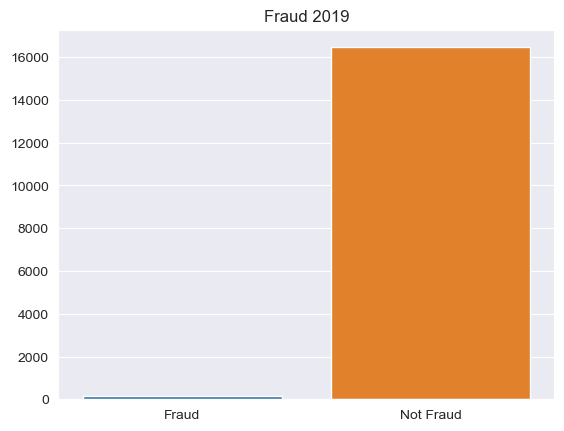

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

x = ['Fraud', 'Not Fraud']
y = [167,16463]

sns.barplot(x, y,x = "Class", y = "Number of transactions").set(title='Fraud 2019')
plt.show()

In [142]:
df_model2.groupby(['class'])['class'].count()

class
0    16632
1      842
Name: class, dtype: int64

C:\Users\Jenny.Son\Anaconda3\envs\geoenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


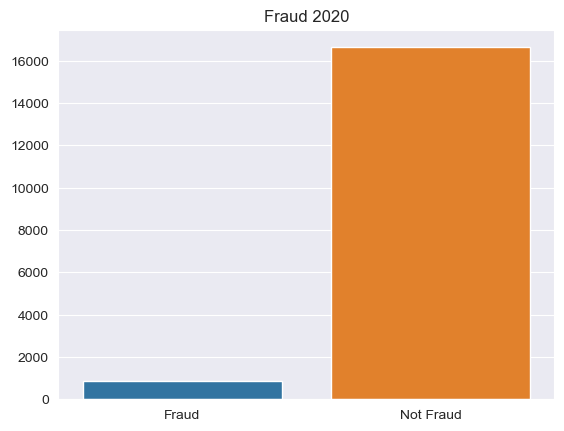

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

x = ['Fraud', 'Not Fraud']
y = [842,16632]

sns.barplot(x, y,x = "Class", y = "Number of transactions").set(title='Fraud 2020')
plt.show()

In [143]:
df_model3.groupby(['class'])['class'].count()

class
0    16458
1     1691
Name: class, dtype: int64

C:\Users\Jenny.Son\Anaconda3\envs\geoenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


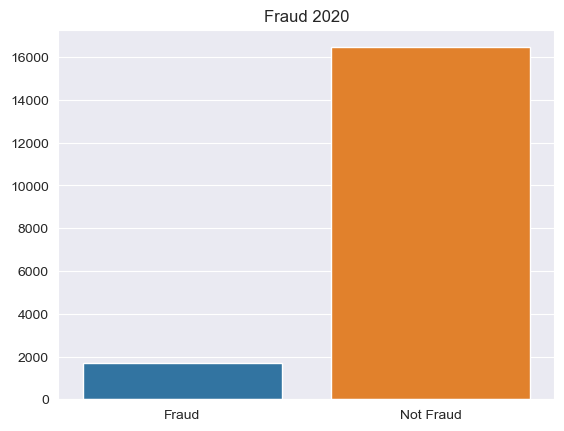

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

x = ['Fraud', 'Not Fraud']
y = [1691,16458]

sns.barplot(x, y,x = "Class", y = "Number of transactions").set(title='Fraud 2020')
plt.show()

In [163]:
# seperate target and feature variables

y = df_model1['class']
X = df_model1.drop(['class','date','year'], axis=1)

X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

In [164]:
X

array([[-3.7031904e-01, -1.5385212e+00, -8.3948910e-01, ...,
        -1.5542278e+00, -9.9371292e+01,  7.0000000e+00],
       [-4.6816242e-01,  6.4601594e-01,  3.1715405e-01, ...,
        -1.6117320e+00,  1.1122346e+02,  6.0000000e+00],
       [ 1.0966822e+00,  2.2761190e-01,  7.4031693e-01, ...,
        -3.6915085e-01,  5.6760418e+01,  1.0000000e+01],
       ...,
       [-5.7641858e-01,  7.1224171e-01, -7.3399478e-01, ...,
        -8.1270415e-01, -7.6959785e+01,  3.0000000e+00],
       [ 5.0390017e-01,  1.8516832e-03, -1.3912080e-01, ...,
        -1.8543209e+00, -1.0573788e+01,  2.0000000e+00],
       [-4.1851151e-01, -1.0736307e+00, -1.2410594e+00, ...,
         1.8596563e-01, -2.3166211e+02,  4.0000000e+00]], dtype=float32)

In [165]:
y

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(256, input_shape=(X.shape[1],), activation='sigmoid'))

In [173]:
model = Sequential() 
model.add(Dense(512, input_shape=(X.shape[1],), activation='relu', input_dim=3)) 
model.add(Dense(512, activation='relu')) 
model.add(Dense(1)) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [174]:

# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)


Epoch 1/150
1663/1663 [==============================] - 9s 4ms/step - loss: 0.1642 - accuracy: 0.9893
Epoch 2/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 3/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 4/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 5/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 6/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 7/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 8/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 9/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 10/150
1663/1663 [==============================] - 7s 4ms/step - l

1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 80/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 81/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 82/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 83/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 84/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 85/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 86/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 87/150
1663/1663 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9900
Epoch 88/150
1663/1663 [==============================] - 7s 4ms/step - loss:

In [176]:

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

520/520 [==============================] - 2s 3ms/step - loss: 0.1549 - accuracy: 0.9900
Accuracy: 99.00


In [177]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

520/520 [==============================] - 1s 2ms/step
[-0.37031903862953186, -1.53852117061615, -0.8394891023635864, 0.4915955662727356, 0.237622931599617, 0.39350059628486633, 0.4562704861164093, 0.5651851296424866, -0.5701286196708679, -0.7874662280082703, 0.6966190934181213, 0.875986635684967, 1.7839930057525635, 0.6268819570541382, 0.49810823798179626, 0.2772560715675354, -0.18451479077339172, -0.7701352834701538, -0.4852692782878876, -1.5542278289794922, -99.37129211425781, 7.0] => 0 (expected 0)
[-0.4681624174118042, 0.6460159420967102, 0.31715404987335205, 0.38648802042007446, 0.14980727434158325, 0.5002788305282593, -0.5542858242988586, 0.6016489267349243, -2.3455092906951904, 0.41752564907073975, 1.0894490480422974, 0.7570933103561401, 0.5942206382751465, 0.29696863889694214, -1.324380874633789, -1.4093469381332397, -0.1302899867296219, -2.1976451873779297, -0.7581666707992554, -1.611732006072998, 111.22345733642578, 6.0] => 0 (expected 0)
[1.0966821908950806, 0.2276118993759

In [178]:
# evaluate the keras model on test data 2020

# seperate target and feature variables

y = df_model2['class']
X = df_model2.drop(['class','date','year'], axis=1)

X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')


_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

547/547 [==============================] - 2s 3ms/step - loss: 0.7433 - accuracy: 0.9518
Accuracy: 95.18


In [179]:
# evaluate the keras model on test data 2021

# seperate target and feature variables

y = df_model3['class']
X = df_model3.drop(['class','date','year'], axis=1)

X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')


_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

568/568 [==============================] - 2s 3ms/step - loss: 1.4372 - accuracy: 0.9068
Accuracy: 90.68


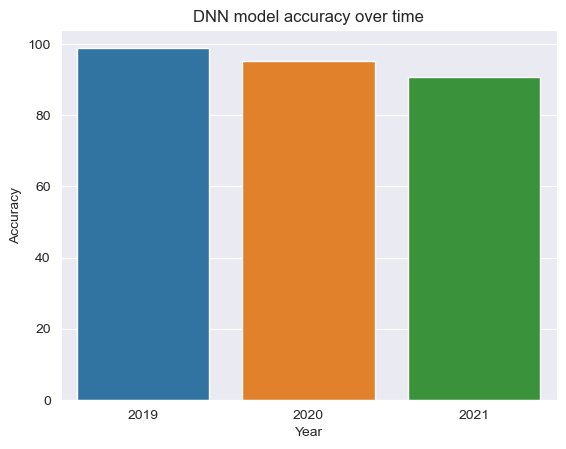

In [193]:
Year = [2019,2020,2021]
Accuracy = [99, 95.18, 90.68]

data_plot = pd.DataFrame({"Year":Year, "Accuracy":Accuracy})

sns.barplot(x = "Year", y = "Accuracy", data=data_plot).set(title='DNN model accuracy over time')
plt.show()

# Apply PSO optimization

In [195]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


# Import PySwarms
import pyswarms as ps

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [223]:
# seperate target and feature variables

y = df_model1['class']
X = df_model1.drop(['class','date','year'], axis=1)

X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

In [228]:
len(X)

16630

In [274]:
X.shape[1]

22

In [278]:
 X.shape[0]

16630

In [249]:
y.shape

(16630,)

In [315]:
import numpy as np
from mealpy.swarm_based.PSO import CL_PSO

def fitness_function(solution):
    return np.sum(solution**2)

problem_dict1 = {
    "fit_func": fitness_function,
    "lb": [-10, -15, -4, -2, -8],
    "ub": [10, 15, 12, 8, 20],
    "minmax": "min",
}

epoch = 1000
pop_size = 50
c_local = 1.2
w_min = 0.4
w_max = 0.9
max_flag = 7

model = CL_PSO(epoch, pop_size, c_local, w_min, w_max, max_flag)


best_position, best_fitness = model.solve(problem_dict1)
print(f"Solution: {best_position}, Fitness: {best_fitness}")

INFO:mealpy.swarm_based.PSO.CL_PSO:Solving single objective optimization problem.
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 1, Current best: 32.75778467156045, Global best: 32.75778467156045, Runtime: 0.01060 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 2, Current best: 32.74907653116428, Global best: 32.74907653116428, Runtime: 0.01412 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 3, Current best: 32.74906870347856, Global best: 32.74906870347856, Runtime: 0.01148 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 4, Current best: 32.749068692911194, Global best: 32.749068692911194, Runtime: 0.01389 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 5, Current best: 13.930783384825792, Global best: 13.930783384825792, Runtime: 0.01151 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 6, Current best: 13.930783384825792, Global best: 13.930783384825792, Runtime: 0.01371 seconds
INFO:mealpy.swarm_based.

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 55, Current best: 0.027166145406957352, Global best: 0.027166145406957352, Runtime: 0.01123 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 56, Current best: 0.027166145406957352, Global best: 0.027166145406957352, Runtime: 0.01436 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 57, Current best: 0.027166145406957352, Global best: 0.027166145406957352, Runtime: 0.01240 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 58, Current best: 0.027166145406957352, Global best: 0.027166145406957352, Runtime: 0.01378 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 59, Current best: 0.025925232861046296, Global best: 0.025925232861046296, Runtime: 0.01317 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 60, Current best: 0.025916850467824517, Global best: 0.025916850467824517, Runtime: 0.01385 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 61, Current bes

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 108, Current best: 0.00022392320362833322, Global best: 0.00022392320362833322, Runtime: 0.01342 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 109, Current best: 9.264353647115384e-05, Global best: 9.264353647115384e-05, Runtime: 0.01202 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 110, Current best: 9.264353647115384e-05, Global best: 9.264353647115384e-05, Runtime: 0.01225 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 111, Current best: 9.264353647115384e-05, Global best: 9.264353647115384e-05, Runtime: 0.01416 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 112, Current best: 9.264353647115384e-05, Global best: 9.264353647115384e-05, Runtime: 0.01328 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 113, Current best: 9.264353647115384e-05, Global best: 9.264353647115384e-05, Runtime: 0.01457 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Ep

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 160, Current best: 4.879440727662372e-06, Global best: 4.879440727662372e-06, Runtime: 0.01242 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 161, Current best: 4.879440727662372e-06, Global best: 4.879440727662372e-06, Runtime: 0.01241 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 162, Current best: 4.879440727662372e-06, Global best: 4.879440727662372e-06, Runtime: 0.01402 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 163, Current best: 4.879440727662372e-06, Global best: 4.879440727662372e-06, Runtime: 0.01388 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 164, Current best: 4.879440727662372e-06, Global best: 4.879440727662372e-06, Runtime: 0.01343 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 165, Current best: 4.879440727662372e-06, Global best: 4.879440727662372e-06, Runtime: 0.01111 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoc

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 212, Current best: 1.1862982943129823e-07, Global best: 1.1862982943129823e-07, Runtime: 0.01394 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 213, Current best: 1.1862982943129823e-07, Global best: 1.1862982943129823e-07, Runtime: 0.01285 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 214, Current best: 1.1862982943129823e-07, Global best: 1.1862982943129823e-07, Runtime: 0.01235 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 215, Current best: 1.0268789162364172e-07, Global best: 1.0268789162364172e-07, Runtime: 0.01291 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 216, Current best: 1.0268789162364172e-07, Global best: 1.0268789162364172e-07, Runtime: 0.01282 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 217, Current best: 1.0268789162364172e-07, Global best: 1.0268789162364172e-07, Runtime: 0.01222 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Prob

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 264, Current best: 2.5882176435607956e-09, Global best: 2.5882176435607956e-09, Runtime: 0.01037 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 265, Current best: 2.5882176435607956e-09, Global best: 2.5882176435607956e-09, Runtime: 0.01199 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 266, Current best: 2.5882176435607956e-09, Global best: 2.5882176435607956e-09, Runtime: 0.01119 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 267, Current best: 2.5882176435607956e-09, Global best: 2.5882176435607956e-09, Runtime: 0.01178 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 268, Current best: 2.5882176435607956e-09, Global best: 2.5882176435607956e-09, Runtime: 0.01075 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 269, Current best: 2.5882176435607956e-09, Global best: 2.5882176435607956e-09, Runtime: 0.01204 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Prob

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 316, Current best: 9.655023566985368e-11, Global best: 9.655023566985368e-11, Runtime: 0.01167 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 317, Current best: 9.655023566985368e-11, Global best: 9.655023566985368e-11, Runtime: 0.01112 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 318, Current best: 9.655023566985368e-11, Global best: 9.655023566985368e-11, Runtime: 0.01358 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 319, Current best: 9.655023566985368e-11, Global best: 9.655023566985368e-11, Runtime: 0.01221 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 320, Current best: 9.654802892026854e-11, Global best: 9.654802892026854e-11, Runtime: 0.01335 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 321, Current best: 9.654802892026854e-11, Global best: 9.654802892026854e-11, Runtime: 0.01362 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoc

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 368, Current best: 7.247635248185852e-12, Global best: 7.247635248185852e-12, Runtime: 0.00982 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 369, Current best: 5.502089374116473e-12, Global best: 5.502089374116473e-12, Runtime: 0.01254 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 370, Current best: 5.502089374116473e-12, Global best: 5.502089374116473e-12, Runtime: 0.01248 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 371, Current best: 5.502089374116473e-12, Global best: 5.502089374116473e-12, Runtime: 0.00970 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 372, Current best: 5.502089374116473e-12, Global best: 5.502089374116473e-12, Runtime: 0.01115 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 373, Current best: 4.607580223051312e-12, Global best: 4.607580223051312e-12, Runtime: 0.00929 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoc

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 420, Current best: 3.1208443740390337e-13, Global best: 3.1208443740390337e-13, Runtime: 0.01027 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 421, Current best: 3.1208443740390337e-13, Global best: 3.1208443740390337e-13, Runtime: 0.00903 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 422, Current best: 3.1208443740390337e-13, Global best: 3.1208443740390337e-13, Runtime: 0.01213 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 423, Current best: 3.1208443740390337e-13, Global best: 3.1208443740390337e-13, Runtime: 0.01025 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 424, Current best: 3.1208443740390337e-13, Global best: 3.1208443740390337e-13, Runtime: 0.01086 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 425, Current best: 3.1208443740390337e-13, Global best: 3.1208443740390337e-13, Runtime: 0.01205 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Prob

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 472, Current best: 3.8414220125455574e-14, Global best: 3.8414220125455574e-14, Runtime: 0.01205 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 473, Current best: 3.8414220125455574e-14, Global best: 3.8414220125455574e-14, Runtime: 0.01070 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 474, Current best: 3.8414220125455574e-14, Global best: 3.8414220125455574e-14, Runtime: 0.01070 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 475, Current best: 3.841363219437331e-14, Global best: 3.841363219437331e-14, Runtime: 0.01166 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 476, Current best: 3.841363219437331e-14, Global best: 3.841363219437331e-14, Runtime: 0.00949 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 477, Current best: 3.841363219437331e-14, Global best: 3.841363219437331e-14, Runtime: 0.01209 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 524, Current best: 1.5950838718677776e-14, Global best: 1.5950838718677776e-14, Runtime: 0.01156 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 525, Current best: 1.5950838718677776e-14, Global best: 1.5950838718677776e-14, Runtime: 0.01179 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 526, Current best: 1.5950838718677776e-14, Global best: 1.5950838718677776e-14, Runtime: 0.01083 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 527, Current best: 1.5950838718677776e-14, Global best: 1.5950838718677776e-14, Runtime: 0.00953 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 528, Current best: 1.5847583247333178e-14, Global best: 1.5847583247333178e-14, Runtime: 0.01149 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 529, Current best: 1.5847583247333178e-14, Global best: 1.5847583247333178e-14, Runtime: 0.01221 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Prob

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 576, Current best: 2.7511646569940353e-17, Global best: 2.7511646569940353e-17, Runtime: 0.01188 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 577, Current best: 2.7511646569940353e-17, Global best: 2.7511646569940353e-17, Runtime: 0.01166 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 578, Current best: 2.7511646569940353e-17, Global best: 2.7511646569940353e-17, Runtime: 0.01042 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 579, Current best: 2.7511646569940353e-17, Global best: 2.7511646569940353e-17, Runtime: 0.01285 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 580, Current best: 2.7511646569940353e-17, Global best: 2.7511646569940353e-17, Runtime: 0.01281 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 581, Current best: 2.749047035563116e-17, Global best: 2.749047035563116e-17, Runtime: 0.01013 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Proble

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 628, Current best: 2.749047035563116e-17, Global best: 2.749047035563116e-17, Runtime: 0.00989 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 629, Current best: 2.749047035563116e-17, Global best: 2.749047035563116e-17, Runtime: 0.01126 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 630, Current best: 2.749047035563116e-17, Global best: 2.749047035563116e-17, Runtime: 0.00955 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 631, Current best: 2.749047035563116e-17, Global best: 2.749047035563116e-17, Runtime: 0.01135 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 632, Current best: 2.749047035563116e-17, Global best: 2.749047035563116e-17, Runtime: 0.01000 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 633, Current best: 2.749047035563116e-17, Global best: 2.749047035563116e-17, Runtime: 0.01178 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoc

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 680, Current best: 2.4309604526250503e-17, Global best: 2.4309604526250503e-17, Runtime: 0.01169 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 681, Current best: 2.220756069295369e-17, Global best: 2.220756069295369e-17, Runtime: 0.01257 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 682, Current best: 2.220756069295369e-17, Global best: 2.220756069295369e-17, Runtime: 0.01197 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 683, Current best: 2.220756069295369e-17, Global best: 2.220756069295369e-17, Runtime: 0.01181 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 684, Current best: 2.220756069295369e-17, Global best: 2.220756069295369e-17, Runtime: 0.01067 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 685, Current best: 2.220756069295369e-17, Global best: 2.220756069295369e-17, Runtime: 0.01169 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Ep

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 732, Current best: 5.4186062389460344e-18, Global best: 5.4186062389460344e-18, Runtime: 0.00956 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 733, Current best: 5.4186062389460344e-18, Global best: 5.4186062389460344e-18, Runtime: 0.01168 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 734, Current best: 3.9128892157908115e-18, Global best: 3.9128892157908115e-18, Runtime: 0.01052 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 735, Current best: 3.9128892157908115e-18, Global best: 3.9128892157908115e-18, Runtime: 0.01231 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 736, Current best: 3.9128892157908115e-18, Global best: 3.9128892157908115e-18, Runtime: 0.00954 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 737, Current best: 3.9128892157908115e-18, Global best: 3.9128892157908115e-18, Runtime: 0.01201 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Prob

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 784, Current best: 2.6624985367872682e-18, Global best: 2.6624985367872682e-18, Runtime: 0.01090 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 785, Current best: 2.6624985367872682e-18, Global best: 2.6624985367872682e-18, Runtime: 0.01026 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 786, Current best: 2.6624985367872682e-18, Global best: 2.6624985367872682e-18, Runtime: 0.01329 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 787, Current best: 2.6624985367872682e-18, Global best: 2.6624985367872682e-18, Runtime: 0.01121 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 788, Current best: 2.6624985367872682e-18, Global best: 2.6624985367872682e-18, Runtime: 0.01243 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 789, Current best: 2.6624985367872682e-18, Global best: 2.6624985367872682e-18, Runtime: 0.00991 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Prob

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 836, Current best: 1.3170397737222296e-18, Global best: 1.3170397737222296e-18, Runtime: 0.01234 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 837, Current best: 1.3170397737222296e-18, Global best: 1.3170397737222296e-18, Runtime: 0.00982 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 838, Current best: 1.3170397737222296e-18, Global best: 1.3170397737222296e-18, Runtime: 0.01097 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 839, Current best: 1.2956636980941684e-18, Global best: 1.2956636980941684e-18, Runtime: 0.01294 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 840, Current best: 1.2877962684106454e-18, Global best: 1.2877962684106454e-18, Runtime: 0.01052 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 841, Current best: 1.284851375746819e-18, Global best: 1.284851375746819e-18, Runtime: 0.01108 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Proble

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 889, Current best: 3.345810310693599e-19, Global best: 3.345810310693599e-19, Runtime: 0.01118 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 890, Current best: 3.143487996301443e-19, Global best: 3.143487996301443e-19, Runtime: 0.01076 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 891, Current best: 3.143487996301443e-19, Global best: 3.143487996301443e-19, Runtime: 0.01153 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 892, Current best: 3.143487996301443e-19, Global best: 3.143487996301443e-19, Runtime: 0.00940 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 893, Current best: 3.143487996301443e-19, Global best: 3.143487996301443e-19, Runtime: 0.01096 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 894, Current best: 3.143487996301443e-19, Global best: 3.143487996301443e-19, Runtime: 0.01058 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoc

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 941, Current best: 1.0194521678376743e-19, Global best: 1.0194521678376743e-19, Runtime: 0.01224 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 942, Current best: 9.959237222803332e-20, Global best: 9.959237222803332e-20, Runtime: 0.01104 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 943, Current best: 8.758657922149801e-20, Global best: 8.758657922149801e-20, Runtime: 0.01102 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 944, Current best: 8.758657922149801e-20, Global best: 8.758657922149801e-20, Runtime: 0.01110 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 945, Current best: 8.758657922149801e-20, Global best: 8.758657922149801e-20, Runtime: 0.01165 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 946, Current best: 8.758657922149801e-20, Global best: 8.758657922149801e-20, Runtime: 0.01102 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Ep

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 993, Current best: 5.1002626992510597e-20, Global best: 5.1002626992510597e-20, Runtime: 0.01210 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 994, Current best: 4.664635452320479e-20, Global best: 4.664635452320479e-20, Runtime: 0.01166 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 995, Current best: 4.664635452320479e-20, Global best: 4.664635452320479e-20, Runtime: 0.00904 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 996, Current best: 4.664635452320479e-20, Global best: 4.664635452320479e-20, Runtime: 0.01248 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 997, Current best: 4.664635452320479e-20, Global best: 4.664635452320479e-20, Runtime: 0.01100 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 998, Current best: 4.664635452320479e-20, Global best: 4.664635452320479e-20, Runtime: 0.01019 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Ep

Solution: [-3.85813261e-11 -9.03542507e-11  1.52319900e-10  2.67449970e-11
  1.06391631e-10], Fitness: 4.488823536681315e-20


In [289]:
# univariate mlp example
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from mealpy.swarm_based import PSO
from mealpy.evolutionary_based import FPA
from permetrics.regression import RegressionMetric

In [290]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [291]:
class HybridMlp:

    def __init__(self, dataset, n_hidden_nodes, epoch, pop_size):
        self.X_train, self.X_test, self.Y_train, self.Y_test = dataset[0], dataset[1], dataset[2], dataset[3]
        self.n_hidden_nodes = n_hidden_nodes
        self.epoch = epoch
        self.pop_size = pop_size
        self.model, self.problem, self.optimizer, self.solution, self.best_fit = None, None, None, None, None
        self.n_dims, self.n_inputs = None, None

    def create_network(self):
        # define model
        model = Sequential()
        model.add(Dense(self.n_hidden_nodes, activation='relu', input_dim=n_steps))
        model.add(Dense(1))
        # model.compile(optimizer='adam', loss='mse')
        self.model = model

    def create_problem(self):
        self.n_inputs = self.X_train.shape[1]
        self.n_dims = (self.n_inputs * self.n_hidden_nodes) + self.n_hidden_nodes + (self.n_hidden_nodes * 1) + 1
        self.problem = {
            "fit_func": self.fitness_function,
            "lb": [-1, ] * self.n_dims,
            "ub": [1, ] * self.n_dims,
            "minmax": "min",
            "obj_weights": [0.3, 0.2, 0.5],  # [mae, mse, rmse]
            "save_population": False,
        }

    def prediction(self, solution, data):
        self.decode_solution(solution)
        return self.model.predict(data)

    def training(self):
        self.create_network()
        self.create_problem()
        # self.optimizer = GWO.OriginalGWO(self.problem, self.epoch, self.pop_size)
        self.optimizer = PSO.OriginalPSO(self.epoch, self.pop_size)
        self.solution, self.best_fit = self.optimizer.solve(self.problem, mode="thread")

        # 3 input nodes, 5 hidden node (1 single hidden layer), 1 output node
        # solution = [w11, w21, w31, w12, w22, w32, ....,  w15, w25, w35, b1, b2, b3, b4, b5, wh11, wh21, wh31, wh41, wh51, bo]
        # number of weights = number of dimensions = 3 * 5 + 5 + 5 * 1 + 1 = 26

    def decode_solution(self, solution=None):
        ## solution: vector
        ### Transfer solution back into weights of neural network
        weight_sizes = [(w.shape, np.size(w)) for w in self.model.get_weights()]
        weights = []
        cut_point = 0
        for ws in weight_sizes:
            temp = np.reshape(solution[cut_point: cut_point + ws[1]], ws[0])
            weights.append(temp)
            cut_point += ws[1]
        self.model.set_weights(weights)

    def fitness_function(self, solution):
        ## Training score and Testing score for fitness function
        ## with the weight: [0.3, 0.7]
        self.decode_solution(solution)
        predictions = self.model.predict(self.X_train)
        obj_metric = RegressionMetric(self.Y_train.flatten(), predictions.flatten())
        # mse = obj_metric.get_metric_by_name("MSE")
        # rmse = obj_metric.get_metric_by_name("RMSE")
        # mae = obj_metric.get_metric_by_name("MAE")
        results_dict = obj_metric.get_metrics_by_list_names(["RMSE", "MAE", "MSE"])
        mae, mse, rmse = results_dict["MAE"], results_dict["MSE"], results_dict["RMSE"]
        return [mae, mse, rmse]

In [292]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
# choose a number of time steps
n_steps = 3
# split into samples
X_train, Y_train = split_sequence(raw_seq[0:12], n_steps)
X_test, Y_test = split_sequence(raw_seq[12:20], n_steps)



In [293]:
## Initialization parameters
dataset = [X_train, X_test, Y_train, Y_test]
n_hidden_nodes = 5
epoch = 100
pop_size = 50

In [294]:
## Create hybrid model
model = HybridMlp(dataset, n_hidden_nodes, epoch, pop_size)
model.training()

1/1 [==============================] - 0s 94ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:Solving 3-objective optimization problem with weights: [0.3 0.2 0.5].


1/1 [==============================] - 0s 38ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 1, Current best: 11.117208, Global best: 11.117208, Runtime: 2.33876 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 2, Current best: 11.117208, Global best: 11.117208, Runtime: 2.77223 seconds


1/1 [==============================] - 0s 63ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 3, Current best: 11.117208, Global best: 11.117208, Runtime: 2.21569 seconds


1/1 [==============================] - 0s 20ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 4, Current best: 3.3656430000000004, Global best: 3.3656430000000004, Runtime: 2.21549 seconds


1/1 [==============================] - 0s 30ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 5, Current best: 3.3656430000000004, Global best: 3.3656430000000004, Runtime: 2.23229 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 6, Current best: 0.225012, Global best: 0.225012, Runtime: 2.27663 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 7, Current best: 0.225012, Global best: 0.225012, Runtime: 2.30557 seconds


1/1 [==============================] - 0s 20ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 8, Current best: 0.225012, Global best: 0.225012, Runtime: 2.33428 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 9, Current best: 0.225012, Global best: 0.225012, Runtime: 2.26109 seconds


1/1 [==============================] - 0s 24ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 10, Current best: 0.225012, Global best: 0.225012, Runtime: 2.32237 seconds


1/1 [==============================] - 0s 20ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 11, Current best: 0.225012, Global best: 0.225012, Runtime: 2.92339 seconds


1/1 [==============================] - 0s 31ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 12, Current best: 0.225012, Global best: 0.225012, Runtime: 2.31247 seconds


1/1 [==============================] - 0s 23ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 13, Current best: 0.225012, Global best: 0.225012, Runtime: 2.32425 seconds


1/1 [==============================] - 0s 29ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 14, Current best: 0.225012, Global best: 0.225012, Runtime: 2.32458 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 15, Current best: 0.225012, Global best: 0.225012, Runtime: 2.25826 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 16, Current best: 0.225012, Global best: 0.225012, Runtime: 2.21941 seconds


1/1 [==============================] - 0s 23ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 17, Current best: 0.225012, Global best: 0.225012, Runtime: 2.23613 seconds


1/1 [==============================] - 0s 20ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 18, Current best: 0.225012, Global best: 0.225012, Runtime: 2.23305 seconds


1/1 [==============================] - 0s 16ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 19, Current best: 0.225012, Global best: 0.225012, Runtime: 2.91080 seconds


1/1 [==============================] - 0s 24ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 20, Current best: 0.225012, Global best: 0.225012, Runtime: 2.26038 seconds


1/1 [==============================] - 0s 27ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 21, Current best: 0.225012, Global best: 0.225012, Runtime: 2.30451 seconds


1/1 [==============================] - 0s 27ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 22, Current best: 0.225012, Global best: 0.225012, Runtime: 2.24879 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 23, Current best: 0.225012, Global best: 0.225012, Runtime: 2.25821 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 24, Current best: 0.225012, Global best: 0.225012, Runtime: 2.22201 seconds


1/1 [==============================] - 0s 34ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 25, Current best: 0.225012, Global best: 0.225012, Runtime: 2.20760 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 26, Current best: 0.225012, Global best: 0.225012, Runtime: 2.25341 seconds


1/1 [==============================] - 0s 16ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 27, Current best: 0.225012, Global best: 0.225012, Runtime: 2.86807 seconds


1/1 [==============================] - 0s 34ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 28, Current best: 0.225012, Global best: 0.225012, Runtime: 2.29492 seconds


1/1 [==============================] - 0s 20ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 29, Current best: 0.225012, Global best: 0.225012, Runtime: 2.25766 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 30, Current best: 0.225012, Global best: 0.225012, Runtime: 2.23319 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 31, Current best: 0.225012, Global best: 0.225012, Runtime: 2.24210 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 32, Current best: 0.225012, Global best: 0.225012, Runtime: 2.28894 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 33, Current best: 0.225012, Global best: 0.225012, Runtime: 2.23682 seconds


1/1 [==============================] - 0s 24ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 34, Current best: 0.225012, Global best: 0.225012, Runtime: 2.24686 seconds


1/1 [==============================] - 0s 34ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 35, Current best: 0.225012, Global best: 0.225012, Runtime: 2.23440 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 36, Current best: 0.225012, Global best: 0.225012, Runtime: 3.01267 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 37, Current best: 0.225012, Global best: 0.225012, Runtime: 2.26966 seconds


1/1 [==============================] - 0s 24ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 38, Current best: 0.225012, Global best: 0.225012, Runtime: 2.23834 seconds


1/1 [==============================] - 0s 23ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 39, Current best: 0.225012, Global best: 0.225012, Runtime: 2.24900 seconds


1/1 [==============================] - 0s 30ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 40, Current best: 0.225012, Global best: 0.225012, Runtime: 2.26432 seconds


1/1 [==============================] - 0s 29ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 41, Current best: 0.225012, Global best: 0.225012, Runtime: 2.29753 seconds


1/1 [==============================] - 0s 20ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 42, Current best: 0.225012, Global best: 0.225012, Runtime: 2.31875 seconds


1/1 [==============================] - 0s 24ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 43, Current best: 0.225012, Global best: 0.225012, Runtime: 2.24661 seconds


1/1 [==============================] - 0s 31ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 44, Current best: 0.225012, Global best: 0.225012, Runtime: 2.89154 seconds


1/1 [==============================] - 0s 31ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 45, Current best: 0.225012, Global best: 0.225012, Runtime: 2.30711 seconds


1/1 [==============================] - 0s 55ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 46, Current best: 0.225012, Global best: 0.225012, Runtime: 2.83627 seconds


1/1 [==============================] - 0s 34ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 47, Current best: 0.225012, Global best: 0.225012, Runtime: 2.72382 seconds


1/1 [==============================] - 0s 26ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 48, Current best: 0.225012, Global best: 0.225012, Runtime: 2.29990 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 49, Current best: 0.225012, Global best: 0.225012, Runtime: 2.23391 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 50, Current best: 0.225012, Global best: 0.225012, Runtime: 2.21952 seconds


1/1 [==============================] - 0s 25ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 51, Current best: 0.225012, Global best: 0.225012, Runtime: 2.22817 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 52, Current best: 0.225012, Global best: 0.225012, Runtime: 2.24793 seconds


1/1 [==============================] - 0s 16ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 53, Current best: 0.225012, Global best: 0.225012, Runtime: 2.92316 seconds


1/1 [==============================] - 0s 23ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 54, Current best: 0.225012, Global best: 0.225012, Runtime: 2.24686 seconds


1/1 [==============================] - 0s 40ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 55, Current best: 0.225012, Global best: 0.225012, Runtime: 2.23689 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 56, Current best: 0.225012, Global best: 0.225012, Runtime: 2.22882 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 57, Current best: 0.225012, Global best: 0.225012, Runtime: 2.23717 seconds


1/1 [==============================] - 0s 23ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 58, Current best: 0.225012, Global best: 0.225012, Runtime: 2.26091 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 59, Current best: 0.225012, Global best: 0.225012, Runtime: 2.22355 seconds


1/1 [==============================] - 0s 38ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 60, Current best: 0.225012, Global best: 0.225012, Runtime: 2.22872 seconds


1/1 [==============================] - 0s 24ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 61, Current best: 0.225012, Global best: 0.225012, Runtime: 2.27795 seconds


1/1 [==============================] - 0s 25ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 62, Current best: 0.225012, Global best: 0.225012, Runtime: 2.96395 seconds


1/1 [==============================] - 0s 32ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 63, Current best: 0.225012, Global best: 0.225012, Runtime: 2.28160 seconds


1/1 [==============================] - 0s 23ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 64, Current best: 0.225012, Global best: 0.225012, Runtime: 2.27710 seconds


1/1 [==============================] - 0s 24ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 65, Current best: 0.225012, Global best: 0.225012, Runtime: 2.25002 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 66, Current best: 0.225012, Global best: 0.225012, Runtime: 2.28310 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 67, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.27022 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 68, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.30666 seconds


1/1 [==============================] - 0s 25ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 69, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.28109 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 70, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.92011 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 71, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.25674 seconds


1/1 [==============================] - 0s 26ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 72, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.24026 seconds


1/1 [==============================] - 0s 23ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 73, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.26323 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 74, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.27986 seconds


1/1 [==============================] - 0s 42ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 75, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.25591 seconds


1/1 [==============================] - 0s 20ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 76, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.27813 seconds


1/1 [==============================] - 0s 55ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 77, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.18110 seconds


1/1 [==============================] - 0s 16ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 78, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.90441 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 79, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.23904 seconds


1/1 [==============================] - 0s 23ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 80, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.27224 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 81, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.24937 seconds


1/1 [==============================] - 0s 67ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 82, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.27809 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 83, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.28387 seconds


1/1 [==============================] - 0s 25ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 84, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.19545 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 85, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.22840 seconds


1/1 [==============================] - 0s 31ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 86, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.88682 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 87, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.22717 seconds


1/1 [==============================] - 0s 25ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 88, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.25863 seconds


1/1 [==============================] - 0s 23ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 89, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.31350 seconds


1/1 [==============================] - 0s 24ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 90, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.27384 seconds


1/1 [==============================] - 0s 33ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 91, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.25290 seconds


1/1 [==============================] - 0s 27ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 92, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.25595 seconds


1/1 [==============================] - 0s 24ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 93, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.22231 seconds


1/1 [==============================] - 0s 21ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 94, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.23092 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 95, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.88987 seconds


1/1 [==============================] - 0s 34ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 96, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.35977 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 97, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.29090 seconds


1/1 [==============================] - 0s 23ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 98, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.35257 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 99, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.32669 seconds


1/1 [==============================] - 0s 22ms/step


INFO:mealpy.swarm_based.PSO.OriginalPSO:>Problem: P, Epoch: 100, Current best: 0.08524599999999999, Global best: 0.08524599999999999, Runtime: 2.34731 seconds


In [295]:
## Access to the best model
# model.solution

## Predict the up coming time-series points
x_input = np.array([210, 220, 230])
x_input = x_input.reshape((1, n_steps))
yhat = model.prediction(model.solution, x_input)
print(yhat)

1/1 [==============================] - 0s 22ms/step
[[-9.729923]]
